In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [315]:
data = np.loadtxt(fname='Breast_cancer_data.txt')
#data = np.loadtxt(fname='Sample_test_data.txt')

X = data[:,:9]
L = data[:,9]
X = X.astype(int)
L = L.astype(int)
m = (L==0)
m = m.astype(int)

X_n = data.shape[0]
T2 = np.r_[L,m]
T2 = T2.reshape(2,X_n).T
K = 2
N = X_n

X_range0 = [-12,12]
X_range1 = [-12,12]

print(X_n)
print(X[:5,:])
print(T2[:5,:])

print(T2.shape)

583
[[6 8 7 8 6 8 8 9 1]
 [1 1 1 1 5 1 3 1 1]
 [4 2 4 3 2 2 2 1 1]
 [2 1 1 1 3 1 2 1 1]
 [3 1 1 1 2 1 1 1 1]]
[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
(583, 2)


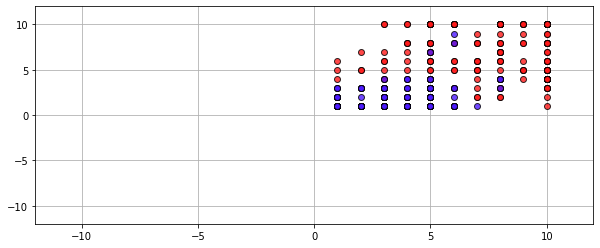

In [316]:
def show_data10(x,t):
    wk, K = t.shape
    #c = [[0.5,0.5,0.5], [1,1,1], [0,0,0]]
    c = [[1,0.1,0.1], [0.3,0.1,1],[0.1,1,0.2]]
    for k in range(K):
        plt.plot(x[t[:,k]==1,0], x[t[:,k]==1,1],
                 linestyle='none', markeredgecolor='black', marker='o',
                 color = c[k], alpha=0.8)
        plt.grid(True)
        
plt.figure(figsize=(10,4))
show_data10(X,T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.show()

In [317]:
def logistic10(x,w):
    exponential = np.zeros(x.shape[0])
    
    for i in range(x.shape[1]):
        exponential = exponential + w[i]*x[:,i]
    exponential = exponential + w[len(w)-1]
      
    y = 1/(1+np.exp(-(exponential)))

    return y

def cee_logistic10(w,x,t):
    X_n = x.shape[0]
    y = logistic10(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n,1]*np.log(y[n])+(1-t[n,1])*np.log(1-y[n]))

    cee = cee/X_n
    return cee

def dcee_logistic10(w,x,t):
    X_n = x.shape[0]
    y = logistic10(x,w)
    dcee = np.zeros(x.shape[1]+1)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n]-t[n,1])*x[n,0]
        dcee[1] = dcee[1] + (y[n]-t[n,1])*x[n,1]
        dcee[2] = dcee[2] + (y[n]-t[n,1])*x[n,2]
        dcee[3] = dcee[3] + (y[n]-t[n,1])*x[n,3]
        dcee[4] = dcee[4] + (y[n]-t[n,1])*x[n,4]
        dcee[5] = dcee[5] + (y[n]-t[n,1])*x[n,5]
        dcee[6] = dcee[6] + (y[n]-t[n,1])*x[n,6]
        dcee[7] = dcee[7] + (y[n]-t[n,1])*x[n,7]
        dcee[8] = dcee[8] + (y[n]-t[n,1])*x[n,8]
        dcee[9] = dcee[9] + (y[n]-t[n,1])*1
    dcee = dcee/X_n
    #print(dcee)
    return dcee

#W = [-1, -5, -0.5, -6, -1, -0.5, 10, 1, -1, -1]
W = [ -1, -1, -1, -1, -1, -1, -1, -1, -1,-1]
dcee_logistic10(W,X,T2)
cee_logistic10(W,X,T2)




10.5574632423707

In [318]:
from scipy.optimize import minimize

def fit_logistic10(w_init,x,t):
    res = minimize(cee_logistic10,w_init,args=(x,t),
                  jac=dcee_logistic10,method="CG")
    return res.x

#W_init = [ -1, -1, -1, -1, -1, -1, -1, -1, -1,-1]
W_init = [0,0,0,0,0,0,0,0,0,0]
W = fit_logistic10(W_init,X,T2)

strW = "W = [ "
for i in range(W.shape[0]) :
    strW = strW + "{0:.3f}  ".format(W[i])
strW = strW + "]"
print(strW)

cee = cee_logistic10(W,X,T2)
print("CEE = {0:f}".format(cee))

np.savetxt('2014140039.txt',W,fmt='%.3f',delimiter=',',newline=' ')


W = [ -0.574  0.063  -0.296  -0.437  -0.109  -0.377  -0.426  -0.192  -0.392  10.054  ]
CEE = 0.080890


In [320]:
def validate_model(w):
    d = np.loadtxt(fname="Sample_test_data.txt")
    #d = np.loadtxt(fname="Breast_cancer_data.txt")
    #d = np.loadtxt(fname="midTerm_total_data.txt")
    X = d[:,:9].astype(int)
    T = d[:,9].astype(int)
    
    N = X.shape[0]
    
    y = np.zeros(N)
    decision = np.zeros(N).astype(int)
    err_cnt = 0
    
    print('No. \t V \t T')
    print('--------------------')
    for i in range(N):
        x = np.r_[X[i,:],1]
        u = np.array(w).dot(x)
        y[i] = 1 / ( 1 + np.exp(-u))
        if y[i] < 0.5 :
            decision[i] = 1
        
        if decision[i] != T[i] :
            err_cnt = err_cnt + 1
        
        print('{0} \t {1} \t {2}'.format(i,decision[i], T[i]))
        
    hit_ratio = np.round((1-err_cnt/N)*100,1)
    
    print('--------------------')
    print('Total error : {0} out of {1}'.format(err_cnt,N))
    print('Hit ratio : {0:.1f} %'.format(hit_ratio))
    
    return hit_ratio

StudentID = "2014140039"
W = np.loadtxt(fname = StudentID+".txt")

print("Student ID: " + StudentID)
print("W = "+np.str(W))
print("\n")

validate_model(W)

Student ID: 2014140039
W = [-0.574  0.063 -0.296 -0.437 -0.109 -0.377 -0.426 -0.192 -0.392 10.054]


No. 	 V 	 T
--------------------
0 	 0 	 0
1 	 0 	 0
2 	 0 	 0
3 	 0 	 0
4 	 1 	 1
5 	 0 	 0
6 	 1 	 1
7 	 1 	 1
8 	 0 	 0
9 	 0 	 0
10 	 1 	 1
11 	 0 	 0
12 	 0 	 0
13 	 0 	 0
14 	 0 	 0
15 	 1 	 1
16 	 1 	 1
17 	 0 	 0
18 	 0 	 0
19 	 1 	 1
20 	 1 	 1
21 	 0 	 0
22 	 1 	 1
23 	 0 	 0
24 	 0 	 0
25 	 1 	 1
26 	 0 	 0
27 	 0 	 0
28 	 1 	 1
29 	 1 	 1
30 	 0 	 0
31 	 0 	 0
32 	 0 	 0
33 	 0 	 0
34 	 0 	 0
35 	 0 	 0
36 	 0 	 0
37 	 0 	 0
38 	 1 	 1
39 	 1 	 1
40 	 0 	 0
41 	 1 	 1
42 	 0 	 0
43 	 0 	 0
44 	 0 	 0
45 	 0 	 0
46 	 0 	 0
47 	 1 	 1
48 	 1 	 1
49 	 0 	 0
50 	 0 	 0
51 	 1 	 1
52 	 1 	 1
53 	 1 	 1
54 	 1 	 1
55 	 0 	 0
56 	 1 	 1
57 	 1 	 1
58 	 1 	 1
59 	 0 	 0
60 	 1 	 1
61 	 1 	 1
62 	 1 	 1
63 	 0 	 0
64 	 0 	 0
65 	 0 	 0
66 	 0 	 0
67 	 0 	 0
68 	 1 	 1
69 	 0 	 0
70 	 0 	 0
71 	 0 	 0
72 	 1 	 0
73 	 1 	 1
74 	 1 	 1
75 	 0 	 0
76 	 0 	 0
77 	 0 	 0
78 	 0 	 0
79 	 1 

98.2